In [13]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
plt.style.use('classic')

## Two helper function to load and fit data

In [2]:
def load(filename='emptyQ1.mat', f_label='fr2Q1', C_label='c2Q1', verbose=False):
    ''' Return frequency and capacitance from mat-file '''
    from scipy.io import loadmat
    mat = loadmat(filename)
    if verbose:
        print(mat.keys())
    f = mat[f_label].flatten()
    C = mat[C_label].flatten()
    return f, C

In [3]:
def fit(f, C, model, p0, fit_method='lin'):
    
    def convert_from_complex_to_real(y):
        ''' Convert array of complex numbers to array of real numbers '''
        eps = np.finfo(float).eps  # For avoding zeros in logarithms
        if fit_method == 'lin':
            return np.abs(y)**2
        elif fit_method == 'log':
            return np.log10(np.real(y)**2+eps)+np.log10(np.imag(y)**2+eps)
        else:
            raise ValueError(f'Unknown switch = {fit_method}')
    
    def fit_func(f, *args):
        ''' The (real) fitting function '''
        C = model(f, *args)
        return convert_from_complex_to_real(C)
    
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(fit_func, f, convert_from_complex_to_real(C), p0=p0)
    
    return popt

# Usage example

Fit parameters: [1.67567591e-08 4.12572087e-09 9.40044491e+04 1.26862300e+02]


<IPython.core.display.Javascript object>


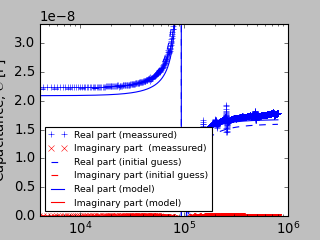

In [37]:
# Load experimental data
f, C = load('emptyQ1.mat', f_label='fr2Q1', C_label='c2Q1')

# Define a fit-model and fit
def model(f, C0, f0, q):
    x = f/f0
    return C0/(1-x*x+1j*x/q)
p0 = 1.6e-8, 9.4e4, 100
C_guess =  model(f, *p0)
popt = fit(f, C, model, p0, fit_method='lin')
C_fit = model(f, *popt)
print('Fit parameters:', popt)

# Plot result
plt.figure(figsize=(4, 3))
plt.plot(f, np.real(C), 'b+', label='Real part (meassured)')
plt.plot(f, np.imag(C), 'rx', label='Imaginary part  (meassured)')
plt.plot(f, np.real(C_guess), 'b--', label='Real part (initial guess)')
plt.plot(f, np.imag(C_guess), 'r--', label='Imaginary part (initial guess)')
plt.plot(f, np.real(C_fit), 'b-', label='Real part (model)')
plt.plot(f, np.imag(C_fit), 'r-', label='Imaginary part (model)')
plt.xscale('log')
plt.ylabel(r'Capacitance, $C$ [F]')
plt.xlabel(r'Frequency, $f$ [Hz]')
plt.ylim(-5e-8, 5e-8)
plt.legend(fontsize='x-small', loc='lower left')
plt.savefig('empty.pdf', dpi=300, bbox_inches='tight')

plt.show()